## 1 Basic Webservice Usage
## 1.1 Introduction
EIDA webservices are designed to provide programmatic access to waveform data and instrument metadata from EIDA. Because webservices requests are URLs, it is possible to communicate directly with the webservice APIs in a browser, command-line tools (e.g. curl; wget) or through abstracted clients (e.g. [ObsPy](http://obspy.org), [fdsnws-fetch](https://github.com/andres-h/fdsnws_scripts/blob/master/fdsnws_fetch.py)).

Webservices are identified by the service domain (URL) that is data center specific, a label that identifies the service (e.g. dataselect; station) and a list of request options (e.g. stream identifiers or time window) included in its query string. In this initial exercise we will introduce three webservices:

* 1.2 FDSNWS-Dataselect - Raw waveform service
* 1.3 FDSNWS-Station - Station metadata and instrument specifics
* 1.4 EIDAWS-WFCatalog - Waveform metadata

In this notebook we will practise direct communication with the webservice APIs in addition to recommended and more convenient workflows using ObsPy.

## 1.2 FDSNWS-Dataselect
### 1.2.1 Interacting with the API
The following example makes a request to the FDSNWS-Dataselect API hosted at ORFEUS Data Center (http://orfeus-eu.org). We will request a 10-minute window of miniSEED data from a single station. The data will be read and plotted using ObsPy. Alternatively, we could save the data to disk. The service label for FDSNWS-Dataselect is:

> fdsnws/dataselect/1/query

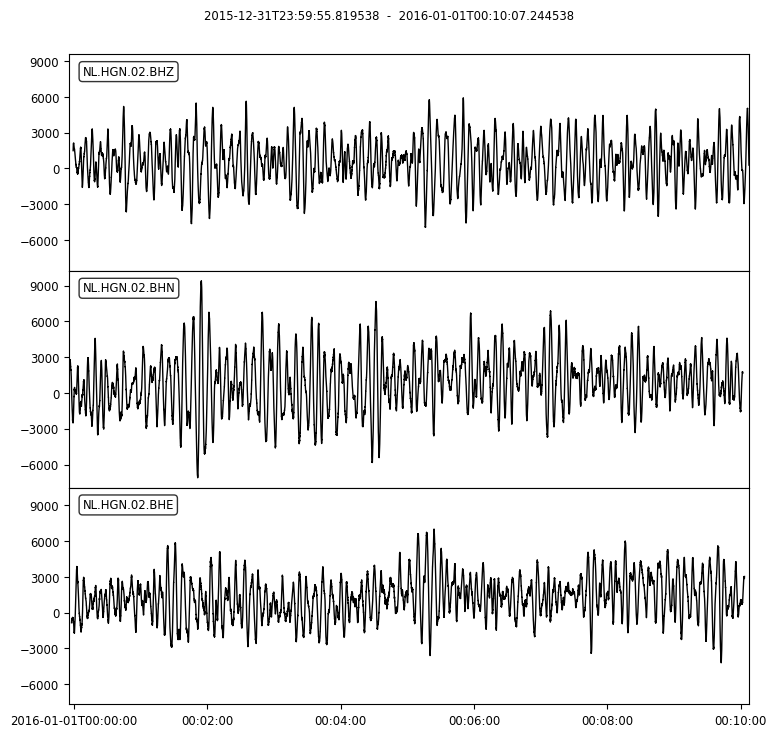

In [8]:
%matplotlib inline

# Import the read module from ObsPy
from obspy import read
from obspy import UTCDateTime

# The URL that points to the dataselect service
# The label that identifies the service
SERVICE_DOMAIN = "http://www.orfeus-eu.org"
LABEL = "fdsnws/dataselect/1/query"

# The 10-minute time window tuple
starttime = UTCDateTime(2016, 1, 1, 0, 0, 0)
endtime = UTCDateTime(2016, 1, 1, 0, 10, 0)

# Get the SEED codes, we will use wildcards for location, channel
network, station, location, channel = "NL", "HGN", "*", "*"

# Create a query string
queryString = "&".join([
    "network=%s" % network,
    "station=%s" % station,
    "location=%s" % location,
    "channel=%s" % channel,
    "starttime=%s" % starttime,
    "endtime=%s" % endtime
])

# The URL that we are requesting data from
# Try visiting this URL in your browser:
# http://www.orfeus-eu.org/fdsnws/dataselect/1/query?network=NL&station=HGN&location=*&channel=*&starttime=2016-01-01T00:00:00&endtime=2016-01-01T00:10:00
st = read("%s/%s?%s" % (SERVICE_DOMAIN, LABEL, queryString))

# Plot the data returned by the webservice
st.plot();

### 1.2.2 Waveforms through ObsPy (recommended usage)
Alternatively we can use the ObsPy library to communicate with the API through an abstracted client. All we need to do is call an ObsPy function with our time window constraint and SEED identifiers. This function will do all the work of the previous exercise for us internally and make the result available for use within ObsPy.

**Note:** Instead of building the URL yourself in the previous exercise, when working with ObsPy it is recommended that the client class is used.

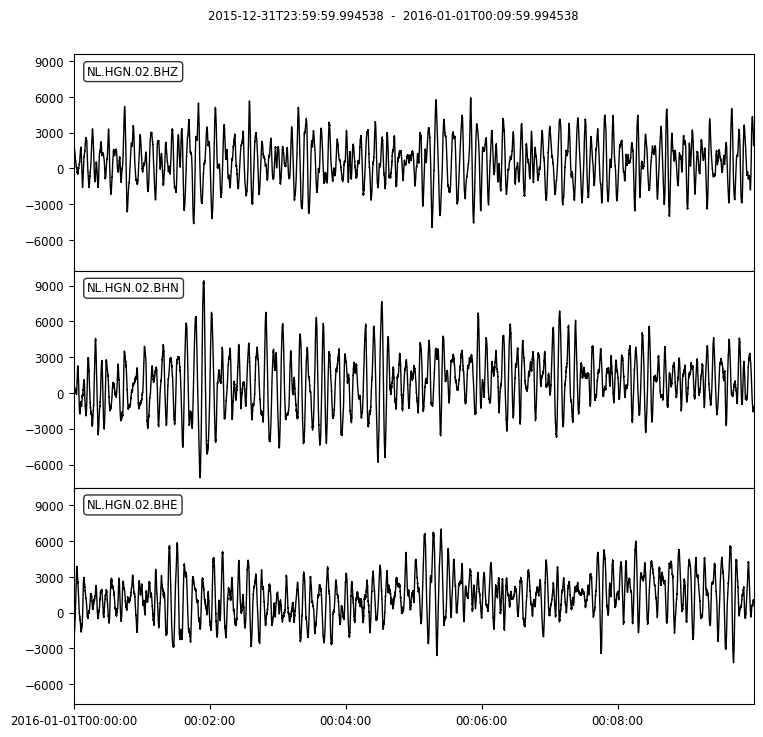

In [10]:
# Include the Client class from ObsPy
from obspy.clients.fdsn import Client

# Create an ObsPy Client that points to ODC (http://www.orfeus-eu.org)
client = Client("ODC")

# Get the waveforms for the same trace identifiers and time window
st = client.get_waveforms(network, station, location, channel, starttime, endtime)

# Plot identical result
st.plot();

## 1.3 FDSNWS-Station
### 1.3.1 Interacting with the API
The fdsnws-station service works similar to the fdsnws-dataselect but has a service different label (*station* instead of *dataselect*). The response of this webservice is StationXML by default. In the following example we will however request the output formatted as text for clarity. The label for this webservice is:

> fdsnws/station/1/query

In [11]:
# Import a library to make a HTTP request to the webservice
import requests

# The URL that points to the station service
SERVICE_DOMAIN = "http://www.orfeus-eu.org"
LABEL = "fdsnws/station/1/query"

# Get the SEED codes for the entire NL network
network, station, location, channel = "NL", "*", "*", "*"

# The query string includes our seed identifiers
# and we request output format text
queryString = "&".join([
    "network=%s" % network,
    "station=%s" % station,
    "location=%s" % location,
    "channel=%s" % channel,
    "format=text",
    "level=station"
])

# The URL that we are requesing
# Try this in your browser:
# http://www.orfeus-eu.org/fdsnws/station/1/query?network=NL&station=*&location=*&channel=*&format=text
r = requests.get("%s/%s?%s" % (SERVICE_DOMAIN, LABEL, queryString))

# This will print station information for all stations in network NL
print(r.text)

#Network|Station|Latitude|Longitude|Elevation|SiteName|StartTime|EndTime
NL|0171|51.03544|5.86908|35.0|Nieuwstadt|2006-01-27T00:00:00|2011-11-25T00:00:00
NL|1979|50.9708|5.9268|80.0|Bingelrade|2009-03-10T00:00:00|2014-11-28T00:00:00
NL|1980|50.8|5.9727|154.0|Mamelis|2009-03-10T00:00:00|2015-04-17T00:00:00
NL|1982|50.86939|6.08469|145.0|Rolduc|2007-12-10T00:00:00|2015-04-17T00:00:00
NL|ALK1|52.633821|4.744356|1.0|Alkmaar - Theater|2019-11-19T00:00:00|
NL|ALK2|52.65104|4.723407|-1.0|Alkmaar - Bergerweg|2019-07-24T00:00:00|
NL|ARCN|51.5013|6.1942|0.0|Arcen|2018-05-23T00:00:00|
NL|ASS1|52.977799|6.557414|9.5|Assen - Beilerstraat|2020-04-14T00:00:00|
NL|ASS2|53.01428|6.570557|12.0|Assen - Borgstee|2020-04-24T00:00:00|
NL|BAPP|53.31482|6.83539|0.0|Appingedam|2013-10-07T00:00:00|
NL|BBER|52.661427|4.7045|2.0|Bergen|2017-12-04T00:00:00|2019-05-21T00:00:00
NL|BER1|52.661396|4.703678|1.0|Bergen - Nesdijk|2019-11-18T00:00:00|
NL|BER2|52.6478|4.714988|-1.0|Bergen - Groeneweg|2019-07-25T00:00:00|
N

Practically, the data would be requested in StatonXML format and saved to file, to be further used during data processing. In the following exercise we will read the data directly into ObsPy. Note again that when working with ObsPy, using the client class is the best solution.

### 1.3.2 Station Metadata through ObsPy (recommended usage)
Alternatively, we use an ObsPy client to be able to directly manipulate the data in ObsPy. In the following example we request the instrument response for a single channel and print the response information. In combination with the raw waveform data returned from dataselect service we can deconvolve the frequency response for this sensor.

Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 3.84869e+09 defined at 1.000 Hz
	3 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 2294
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67772e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 3.88225e+09 defined at 1.000 Hz
	3 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 2314
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67772e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 3.91245e+09 defined at 1.000 Hz
	3 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 2332
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1.67772e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1


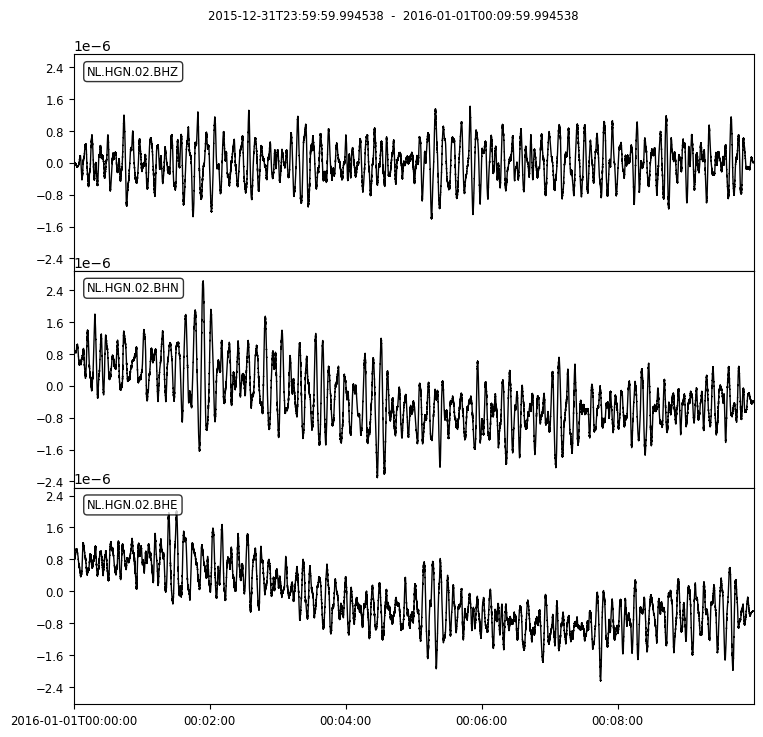

In [12]:
# We will request instrument metadata for a single trace
network, station, location, channel = "NL", "HGN", "02", "BH*"

# We pass level=response to request instrument response metadata
inv = client.get_stations(
    network=network,
    station=station,
    location=location,
    channel=channel,
    level="response"
)

# This object now has response information for the selected trace (NL.HGN.02.BHZ)
for network in inv:
    for station in network:
        for channel in station:
            print(channel.response)

# Deconvolve instrument response
st.remove_response(inventory=inv)

# Plot the data (output units = velocity)
st.plot();

## 1.4 EIDAWS-WFCatalog
The WFCatalog is a catalogue of seismic waveform metadata. This is not to be confused with station metadata but contains purely metadata describing the waveforms. These metadata include availability information (e.g. gaps), sample metrics (e.g. mean, standard deviations, median values) and miniSEED header flags.

The EIDAWS-WFCatalog webservice returns quality metrics from raw waveform data. The WFCatalog can serve as a powerful waveform index for data discovery by appending filters (e.g. lt, ge) to the query string. This can help identify waveforms with metric values below or above a certain threshold. The label for this service is:

> eidaws/wfcatalog/1/query

In [13]:
# The URL that points to the routing service (notice the different eidaws label)
SERVICE_DOMAIN = "http://www.orfeus-eu.org"
LABEL = "eidaws/wfcatalog/1/query"

# The start and end date for the metrics
# Feel free to change the window
starttime, endtime = ("2010-11-01", "2010-11-07")

# Network codes must be comma delimited
network, station, location, channel = "NL.HGN.02.BHZ".split(".")

# The query string includes our seed identifiers, temporal constraints, we ask for sample metrics to be included
# include can be either (default, sample, header, all)
# We request metrics for daily waveforms with an availability over 50%
# Try changing the percent_availability to 100 - less documents will be returned
queryString = "&".join([
    "network=%s" % network,
    "station=%s" % station,
    "location=%s" % location,
    "channel=%s" % channel,
    "starttime=%s" % starttime,
    "endtime=%s" % endtime,
    "include=sample",
    "percent_availability_ge=50"
])

# Try this in your browser:
# http://www.orfeus-eu.org/eidaws/wfcatalog/1/query?network=NL&station=HGN&location=02&channel=BHZ&start=2010-11-01&end=2010-11-07&include=sample
r = requests.get("%s/%s?%s" % (SERVICE_DOMAIN, LABEL, queryString))

# Should print JSON response of quality metrics for three days.
r.json()

[{'version': '1.0.0',
  'producer': {'name': 'ORFEUS ODC/KNMI',
   'agent': 'ObsPy mSEED-QC',
   'created': '2016-06-26T05:04:02.156Z'},
  'station': 'HGN',
  'network': 'NL',
  'location': '02',
  'channel': 'BHZ',
  'num_gaps': 0,
  'num_overlaps': 0,
  'sum_gaps': 0,
  'sum_overlaps': 0,
  'max_gap': None,
  'max_overlap': None,
  'record_length': [4096],
  'sample_rate': [40],
  'percent_availability': 100,
  'encoding': ['STEIM2'],
  'num_records': 992,
  'start_time': '2010-11-01T00:00:00.000Z',
  'end_time': '2010-11-02T00:00:00.000Z',
  'format': 'miniSEED',
  'quality': 'D',
  'sample_min': -7365,
  'sample_max': 9006,
  'sample_mean': 1128.8762473958334,
  'sample_median': 1109,
  'sample_stdev': 1910.6907336014126,
  'sample_rms': 2219.2567813132405,
  'sample_lower_quartile': -178,
  'sample_upper_quartile': 2415},
 {'version': '1.0.0',
  'producer': {'name': 'ORFEUS ODC/KNMI',
   'agent': 'ObsPy mSEED-QC',
   'created': '2016-06-26T05:39:45.988Z'},
  'station': 'HGN',
  'n

## Graphical user interfaces
The following tools are available on orfeus-eu.org and are built on top of the discussed webservices. Please note that these interfaces currently only work for data archived at ORFEUS Data Center.

> http://www.orfeus-eu.org/data/odc/quality

# 2 Advanced Example - Webservices pipeline
## 2.1 Introduction
This example demonstrates the use of FDSN webservices in a processing pipeline. The goal of this exercise is to download raw waveform data from stations surrounding an earthquake. This pipeline is based on functionality provided with ObsPy.

In [14]:
# Define the module imports
import requests
import math

from obspy.taup import TauPyModel
from obspy.geodetics import locations2degrees
from obspy import read, UTCDateTime

import datetime
import dateutil.parser

## 2.2 FDSNWS-Event

We define a function that collects event information from fdsnws-event. We pass an event identifier to the webservice, parse the response and return an Event class that has **location**, **origin time**, and **depth** attributes. The event data is requested from the seismicportal webservice provided by the EMSC.

In [15]:
def getEvent(identifier):

    # Try in your browser:
    # http://www.seismicportal.eu/fdsnws/event/1/query?eventid=20170720_0000091&format=text
    # Service address
    FDSN_EVENT = "http://www.seismicportal.eu/fdsnws/event/1/query"

    # Define class for Events
    class Event():
        def __init__(self, line):
            self.id, self.time, self.latitude, self.longitude, self.depth = line.split("|")[:5]
            self.latitude = float(self.latitude)
            self.longitude = float(self.longitude)
            self.depth = float(self.depth)
            
    # We query for a single event identifier and request a text format return
    queryString = "&".join([
      "eventid=%s" % identifier,
      "format=text"
    ])

    # Create the query for an event identifier
    r = requests.get("%s?%s" % (FDSN_EVENT, queryString))

    # Split by lines and remove head & tail
    lines = r.text.split("\n")[1:-1]

    # Return Event classes for each entry
    return list(map(Event, lines))[0]

In [16]:
# Should print a single Event instance
print(getEvent("20170720_0000091"))

<__main__.getEvent.<locals>.Event object at 0x7f7d1b946710>


## 2.3 FDSNWS-Station

Define a function that can find the stations around an event. We pass the Event instance to the function and call the station webservice to return stations within 20 degrees arc-distance of this event location. We parse the response and return a map of station instances with attributes network, station, and location.

In [17]:
def getStations(event):

    # Try it in your browser:
    # http://orfeus-eu.org/fdsnws/station/1/query?latitude=30&longitude=30&maxradius=20&format=text
    # Service address
    FDSN_STATION = "http://orfeus-eu.org/fdsnws/station/1/query"
    MAX_RADIUS = 20

    # Define a Station class
    class Station():
        def __init__(self, line):
            self.network, self.station, self.latitude, self.longitude = line.split("|")[:4]
            self.latitude = float(self.latitude)
            self.longitude = float(self.longitude)

    # We query with the event location and a maximum radius around the event
    queryString = "&".join([
      "latitude=%s" % event.latitude,
      "longitude=%s" % event.longitude,
      "maxradius=%s" % MAX_RADIUS,
      "format=text"
    ])

    # Request from webservice
    r = requests.get("%s?%s" % (FDSN_STATION, queryString))

    # Split by lines and remove head & tail
    lines = r.text.split("\n")[1:-1]

    # Return Event classes for each entry
    return map(Station, lines)

In [18]:
# Should print a map (array) of Station instances
print(getStations(getEvent("20170720_0000091")))

## 2.4 Theoretical Arrival Times

Define a function that calculates the theoretical P arrival time at a station location using the TauP module in ObsPy. The function takes an Event and Station instance. The arc-distance in degrees between the source and receiver is calculated using the *haversine function* (see below).

In [21]:
# We use the iasp91 reference model
TAUP_MODEL = TauPyModel(model="iasp91")

def getPArrival(event, station):

    # Determine the arc distance using the haversine formula
    arcDistanceDegrees = locations2degrees(
      event.latitude,
      station.latitude,
      event.longitude,
      station.longitude
    )

    # Calculate the theoretical P-arrival time
    arrivals = TAUP_MODEL.get_travel_times(
      source_depth_in_km=1E-3 * event.depth,
      distance_in_degree=arcDistanceDegrees,
      phase_list=["P"]
    )

    # Add the theorical P-arrival delta to the event time
    return UTCDateTime(event.time) + arrivals[0].time

Definition of the havesine function, we pass two latitudes and longitudes and return the arc-distance in degrees. This is a supplementary function.

## 2.5 FDSNWS-Dataselect

The main body of the script that collects an event with event identifier 20170720_0000091. We loop over all the stations returned by the getStations function within 20 degrees arc-distance of the event. In each iteration, we make a call to fdsnws-dataselect to collect the waveform data for all stations between 300 seconds before, and 1200 seconds after the theoretical P-arrival time.

This data (channel BH?) is loaded in to ObsPy using the read function, filtered and plotted. After the first iteration the loop is broken. Alternatively, all data can be saved to disk.


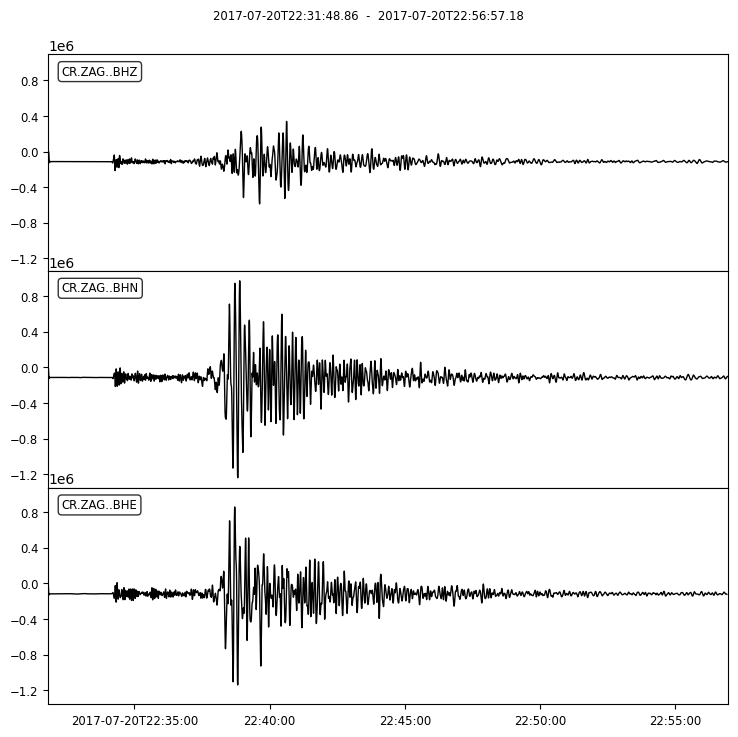

In [22]:
FDSN_DATASELECT = "http://orfeus-eu.org/fdsnws/dataselect/1/query"
EVENT_IDENTIFIER = "20170720_0000091"

# Get the event
event = getEvent(EVENT_IDENTIFIER)

# Go over all stations returned in the radius
for station in getStations(event):

    # Get the theoretical (TauP) pArrval from event to station
    stationArrivalTime = getPArrival(event, station)

    # Create the query for fdsn-dataselect
    # between 300 seconds before & 1200 seconds after the theoretical P-arrival
    queryString = "&".join([
        "network=%s" % station.network,
        "station=%s" % station.station,
        "starttime=%s" % (stationArrivalTime - 300).isoformat(),
        "endtime=%s" % (stationArrivalTime + 1200).isoformat(),
        "channel=BH?"
    ])

    # Get the waveform data and read to ObsPy Stream
    # Empty responses are skipped 
    try:
        st = read("%s?%s" % (FDSN_DATASELECT, queryString))
    except Exception:
        continue

    # Use with ObsPy and apply a filter, then plot
    # Alternatively, we would save the data to a file
    st.filter("lowpass", freq=0.5)
    st.plot()

    # Break after the first result
    break

***
Authors: Mathijs Koymans (KNMI), Jarek Bienkowski (KNMI)